In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.svm import SVR


In [18]:
X_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_cancer')
X_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_cancer')
y_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_cancer')
y_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_cancer')
X_train.head()

,Unnamed: 0,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,6485,9.619276,36.047816,0.474211,0.876779,0.275752,-0.168981,-0.913573,0.199990,0.777805,0.380964
1,43594,8.223783,43.139351,-0.356998,-0.428626,-0.697069,-1.020634,0.155926,0.249718,-1.140785,-1.170917
2,6409,10.730808,58.454660,0.428490,1.122477,1.240986,1.346755,0.156004,1.469951,1.709802,1.619426
3,26709,7.420574,41.348954,-1.310530,-1.810066,-1.713935,-1.618139,0.841218,-0.862884,0.817296,-0.753172
4,6223,10.972723,56.275533,0.478519,1.130917,1.261384,2.263035,0.713374,0.851106,-0.559456,1.379846


In [19]:
X_test.drop('Unnamed: 0', axis=1, inplace=True)
X_train.drop('Unnamed: 0', axis=1, inplace=True)
y_test.drop('Unnamed: 0', axis=1, inplace=True)
y_train.drop('Unnamed: 0', axis=1, inplace=True)


In [20]:
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
y_train.shape


(54242,)

In [21]:
X_test.shape

(18081, 10)

In [22]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,9.622683,29.600035,-1.639995,-0.971751,-1.362666,-1.047182,-0.669540,-0.905317,-0.974360,-1.266618
1,7.972300,41.971266,-1.022176,-0.048773,-0.062436,-0.643767,-0.424850,-0.813518,-1.251934,-1.271981
2,7.750343,41.860095,-0.919446,0.527650,0.530272,-0.423478,-0.158379,0.217464,0.119298,-0.863452
3,7.722780,43.017056,-0.351975,-0.200333,-0.394066,0.020940,-0.848901,-1.378946,0.840540,-0.852716
4,5.667860,39.017925,-0.183154,-0.775738,-1.005893,2.515455,1.692955,0.081519,0.153348,1.152545


In the pre-processeing notebook, I have already done multiple OLS on the data and found no reasonable correlation. In this notebook, the first type of model I will use will be random forest.

In [10]:
# Instantiate RandomForestRegressor and randomly search for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {'n_estimators': sp_randInt(1,500), 'max_depth':sp_randInt(1,30)}

rs = RandomizedSearchCV(rf, params)

In [11]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14dce0670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x148c28e20>})

In [12]:
rs.best_estimator_

RandomForestRegressor(max_depth=26, n_estimators=386)

In [13]:
rf = RandomForestRegressor(max_depth=26, n_estimators=386)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=26, n_estimators=386)

In [14]:
y_pred = rf.predict(X_test)

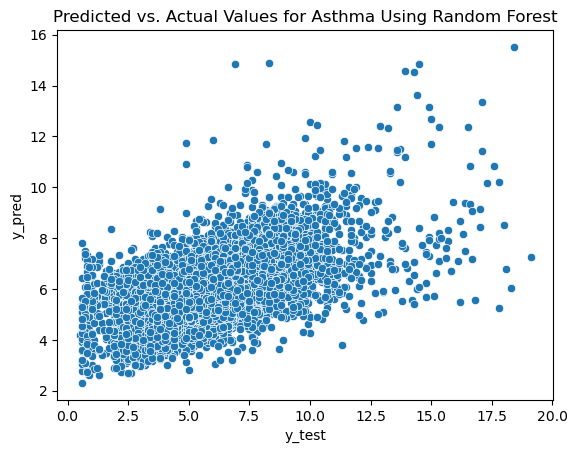

In [15]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for Asthma Using Random Forest')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [16]:
rf.score(X_test, y_test)

0.44233283424581105

This is the best model so far although the results are still not very good.

The next model I will try is a support vector machine regressor.

In [23]:
# Instantiate support vector machine regressor and randomly search for best hyperparameters C and epsilon.
svm = SVR()
params = {'C': sp_randFloat(.01,10), 'epsilon':sp_randFloat(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [24]:
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x14dee4340>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x14def70d0>})

In [25]:
svm_rs.best_estimator_

SVR(C=9.800264655335788, epsilon=0.9288848648682362)

In [26]:
svm = SVR(C=9.800264655335788, epsilon=0.9288848648682362)
svm.fit(X_train, y_train)

SVR(C=9.800264655335788, epsilon=0.9288848648682362)

In [27]:
svm.score(X_test, y_test)

0.2269942913150056

The very low R2 value shows that SVM regression is not a good predictor for this data.